# Midterm-Project: Housing market study for Seattle-2014-15

In [314]:
# we need to import the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.collections import LineCollection
%matplotlib inline
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PowerTransformer
from sklearn.linear_model import LinearRegression
from scipy.stats import boxcox
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_absolute_error as mae
pd.options.display.max_rows = 50
from ipywidgets import interactive
import ipywidgets as widgets
import statsmodels.api as sm
import math

In [315]:
df=pd.read_excel("Data/Data_MidTerm_Project_Real_State_Regression.xls")


In [316]:
df

,id,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price
0,7129300520,2014-10-13,3,1.00,1180,5650,1.0,0,0,3,...,1180,0,1955,0,98178,47.5112,-122.257,1340,5650,221900
1,6414100192,2014-12-09,3,2.25,2570,7242,2.0,0,0,3,...,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639,538000
2,5631500400,2015-02-25,2,1.00,770,10000,1.0,0,0,3,...,770,0,1933,0,98028,47.7379,-122.233,2720,8062,180000
3,2487200875,2014-12-09,4,3.00,1960,5000,1.0,0,0,5,...,1050,910,1965,0,98136,47.5208,-122.393,1360,5000,604000
4,1954400510,2015-02-18,3,2.00,1680,8080,1.0,0,0,3,...,1680,0,1987,0,98074,47.6168,-122.045,1800,7503,510000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,263000018,2014-05-21,3,2.50,1530,1131,3.0,0,0,3,...,1530,0,2009,0,98103,47.6993,-122.346,1530,1509,360000
21593,6600060120,2015-02-23,4,2.50,2310,5813,2.0,0,0,3,...,2310,0,2014,0,98146,47.5107,-122.362,1830,7200,400000
21594,1523300141,2014-06-23,2,0.75,1020,1350,2.0,0,0,3,...,1020,0,2009,0,98144,47.5944,-122.299,1020,2007,402101
21595,291310100,2015-01-16,3,2.50,1600,2388,2.0,0,0,3,...,1600,0,2004,0,98027,47.5345,-122.069,1410,1287,400000


### Funtions

In [317]:
def clean_data(df):
    
    df=df.drop(columns=['id', 'lat',"long"])
    
    return df

In [318]:
clean_data(df)

,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,sqft_living15,sqft_lot15,price
0,2014-10-13,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,1340,5650,221900
1,2014-12-09,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,1690,7639,538000
2,2015-02-25,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,2720,8062,180000
3,2014-12-09,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,1360,5000,604000
4,2015-02-18,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,1800,7503,510000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,2014-05-21,3,2.50,1530,1131,3.0,0,0,3,8,1530,0,2009,0,98103,1530,1509,360000
21593,2015-02-23,4,2.50,2310,5813,2.0,0,0,3,8,2310,0,2014,0,98146,1830,7200,400000
21594,2014-06-23,2,0.75,1020,1350,2.0,0,0,3,7,1020,0,2009,0,98144,1020,2007,402101
21595,2015-01-16,3,2.50,1600,2388,2.0,0,0,3,8,1600,0,2004,0,98027,1410,1287,400000


In [319]:
def outliers_removal(column):
    percentile25 = X[column].quantile(0.25)
    percentile75 = X[column].quantile(0.75)
    iqr = percentile75 - percentile25
    upper_limit = percentile75 + 1.5 * iqr
    lower_limit = percentile25 - 1.5 * iqr
    X[X[column] > upper_limit]

    X[X[column] < lower_limit]
    new_X = X[X[column] < upper_limit]
    new_X.shape
    new_X_cap = X.copy()
    new_X_cap[column] = np.where(
        new_X_cap[column] > upper_limit,
        upper_limit,
        np.where(
            new_X_cap[column] < lower_limit,
            lower_limit,
            new_X_cap[column]
        )
    )
    plt.figure(figsize=(8,8))

    plt.subplot(2,2,1)
    sns.boxplot(X[column])

    plt.subplot(2,2,2)
    sns.boxplot(new_X_cap[column])

    plt.show()

In [320]:
df=clean_data(df)

In [321]:
df

,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,sqft_living15,sqft_lot15,price
0,2014-10-13,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,1340,5650,221900
1,2014-12-09,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,1690,7639,538000
2,2015-02-25,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,2720,8062,180000
3,2014-12-09,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,1360,5000,604000
4,2015-02-18,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,1800,7503,510000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,2014-05-21,3,2.50,1530,1131,3.0,0,0,3,8,1530,0,2009,0,98103,1530,1509,360000
21593,2015-02-23,4,2.50,2310,5813,2.0,0,0,3,8,2310,0,2014,0,98146,1830,7200,400000
21594,2014-06-23,2,0.75,1020,1350,2.0,0,0,3,7,1020,0,2009,0,98144,1020,2007,402101
21595,2015-01-16,3,2.50,1600,2388,2.0,0,0,3,8,1600,0,2004,0,98027,1410,1287,400000


### Working with data type

In [322]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   date           21597 non-null  datetime64[ns]
 1   bedrooms       21597 non-null  int64         
 2   bathrooms      21597 non-null  float64       
 3   sqft_living    21597 non-null  int64         
 4   sqft_lot       21597 non-null  int64         
 5   floors         21597 non-null  float64       
 6   waterfront     21597 non-null  int64         
 7   view           21597 non-null  int64         
 8   condition      21597 non-null  int64         
 9   grade          21597 non-null  int64         
 10  sqft_above     21597 non-null  int64         
 11  sqft_basement  21597 non-null  int64         
 12  yr_built       21597 non-null  int64         
 13  yr_renovated   21597 non-null  int64         
 14  zipcode        21597 non-null  int64         
 15  sqft_living15  2159

In [323]:

# it seems data type is correct

### Replace "0 values" with median

We will check later if we have to deal with "0 values" from waterfront, wiews and yr_renovated

## Removing duplicates

In [324]:
df.drop_duplicates(inplace=True)

In [325]:
df

,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,sqft_living15,sqft_lot15,price
0,2014-10-13,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,1340,5650,221900
1,2014-12-09,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,1690,7639,538000
2,2015-02-25,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,2720,8062,180000
3,2014-12-09,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,1360,5000,604000
4,2015-02-18,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,1800,7503,510000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,2014-05-21,3,2.50,1530,1131,3.0,0,0,3,8,1530,0,2009,0,98103,1530,1509,360000
21593,2015-02-23,4,2.50,2310,5813,2.0,0,0,3,8,2310,0,2014,0,98146,1830,7200,400000
21594,2014-06-23,2,0.75,1020,1350,2.0,0,0,3,7,1020,0,2009,0,98144,1020,2007,402101
21595,2015-01-16,3,2.50,1600,2388,2.0,0,0,3,8,1600,0,2004,0,98027,1410,1287,400000


In [326]:
#there are not duplicates

### creating groups of data

In [327]:
#We think the column "bathrooms" sould be binned
bins= [0,1,2,3,4,5,6,7,8]
df["bathrooms"]= pd.cut(df["bathrooms"],bins)

df


,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,sqft_living15,sqft_lot15,price
0,2014-10-13,3,"(0, 1]",1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,1340,5650,221900
1,2014-12-09,3,"(2, 3]",2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,1690,7639,538000
2,2015-02-25,2,"(0, 1]",770,10000,1.0,0,0,3,6,770,0,1933,0,98028,2720,8062,180000
3,2014-12-09,4,"(2, 3]",1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,1360,5000,604000
4,2015-02-18,3,"(1, 2]",1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,1800,7503,510000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,2014-05-21,3,"(2, 3]",1530,1131,3.0,0,0,3,8,1530,0,2009,0,98103,1530,1509,360000
21593,2015-02-23,4,"(2, 3]",2310,5813,2.0,0,0,3,8,2310,0,2014,0,98146,1830,7200,400000
21594,2014-06-23,2,"(0, 1]",1020,1350,2.0,0,0,3,7,1020,0,2009,0,98144,1020,2007,402101
21595,2015-01-16,3,"(2, 3]",1600,2388,2.0,0,0,3,8,1600,0,2004,0,98027,1410,1287,400000


In [328]:
# We also need to bin the yr_built
np.min(df["yr_built"])
np.max(df["yr_built"])
print(np.min(df["yr_built"]))
print(np.max(df["yr_built"]))            


1900
2015


In [329]:
bins= [1900,1910,1920,1930,1940,1950,1960,1970,1980,1990,2000,2010,2020]
labels=["00s","10s","20s","30s","40s","50s","60s","70s","80s","90s","2000s","2010s"]

df["yr_built"]= pd.cut(df["yr_built"],bins,labels=labels)

df


,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,sqft_living15,sqft_lot15,price
0,2014-10-13,3,"(0, 1]",1180,5650,1.0,0,0,3,7,1180,0,50s,0,98178,1340,5650,221900
1,2014-12-09,3,"(2, 3]",2570,7242,2.0,0,0,3,7,2170,400,50s,1991,98125,1690,7639,538000
2,2015-02-25,2,"(0, 1]",770,10000,1.0,0,0,3,6,770,0,30s,0,98028,2720,8062,180000
3,2014-12-09,4,"(2, 3]",1960,5000,1.0,0,0,5,7,1050,910,60s,0,98136,1360,5000,604000
4,2015-02-18,3,"(1, 2]",1680,8080,1.0,0,0,3,8,1680,0,80s,0,98074,1800,7503,510000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,2014-05-21,3,"(2, 3]",1530,1131,3.0,0,0,3,8,1530,0,2000s,0,98103,1530,1509,360000
21593,2015-02-23,4,"(2, 3]",2310,5813,2.0,0,0,3,8,2310,0,2010s,0,98146,1830,7200,400000
21594,2014-06-23,2,"(0, 1]",1020,1350,2.0,0,0,3,7,1020,0,2000s,0,98144,1020,2007,402101
21595,2015-01-16,3,"(2, 3]",1600,2388,2.0,0,0,3,8,1600,0,2000s,0,98027,1410,1287,400000


In [330]:
# We also needs to change the data type of "grade"
#it has to be categorical
df["grade"]=str(df["grade"])
df["zipcode"]=str(df["zipcode"])
df["view"]=str(df["view"])
df["waterfront"]=str(df["waterfront"])
df["condition"]=str(df["condition"])
df["yr_renovated"]=str(df["yr_renovated"])
df["floors"]=str(df["floors"])
df["bedrooms"]=str(df["bedrooms"])


In [331]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21597 entries, 0 to 21596
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   date           21597 non-null  datetime64[ns]
 1   bedrooms       21597 non-null  object        
 2   bathrooms      21597 non-null  category      
 3   sqft_living    21597 non-null  int64         
 4   sqft_lot       21597 non-null  int64         
 5   floors         21597 non-null  object        
 6   waterfront     21597 non-null  object        
 7   view           21597 non-null  object        
 8   condition      21597 non-null  object        
 9   grade          21597 non-null  object        
 10  sqft_above     21597 non-null  int64         
 11  sqft_basement  21597 non-null  int64         
 12  yr_built       21510 non-null  category      
 13  yr_renovated   21597 non-null  object        
 14  zipcode        21597 non-null  object        
 15  sqft_living15  2159

### Correlation analysis

In [332]:
df.corr()

,sqft_living,sqft_lot,sqft_above,sqft_basement,sqft_living15,sqft_lot15,price
sqft_living,1.000000,0.173453,0.876448,0.435130,0.756402,0.184342,0.701917
sqft_lot,0.173453,1.000000,0.184139,0.015418,0.144763,0.718204,0.089876
sqft_above,0.876448,0.184139,1.000000,-0.052156,0.731767,0.195077,0.605368
sqft_basement,0.435130,0.015418,-0.052156,1.000000,0.200443,0.017550,0.323799
sqft_living15,0.756402,0.144763,0.731767,0.200443,1.000000,0.183515,0.585241
sqft_lot15,0.184342,0.718204,0.195077,0.017550,0.183515,1.000000,0.082845
price,0.701917,0.089876,0.605368,0.323799,0.585241,0.082845,1.000000


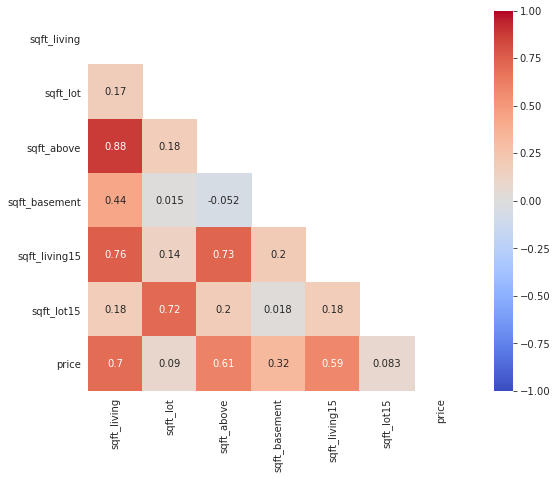

In [333]:
corr = df.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(9, 7))
    ax = sns.heatmap(corr, mask=mask,cmap='coolwarm', vmin=-1,vmax=1,annot=True, square=True)

In [334]:
# we can see hight correlation relation between some variables: 
#we decide to delete the following columns: "sqft_living","sqft_lot","sqft_above"
def drop_columns(df) :
    df.drop(columns=["sqft_living","sqft_lot","sqft_above"], inplace=True)
    return df

In [335]:
drop_columns(df)

,date,bedrooms,bathrooms,floors,waterfront,view,condition,grade,sqft_basement,yr_built,yr_renovated,zipcode,sqft_living15,sqft_lot15,price
0,2014-10-13,0 3\n1 3\n2 2\n3 4...,"(0, 1]",0 1.0\n1 2.0\n2 1.0\n3 ...,0 0\n1 0\n2 0\n3 0...,0 0\n1 0\n2 0\n3 0...,0 3\n1 3\n2 3\n3 5...,0 7\n1 7\n2 6\n3 7...,0,50s,0 0\n1 1991\n2 0\n3...,0 98178\n1 98125\n2 98028...,1340,5650,221900
1,2014-12-09,0 3\n1 3\n2 2\n3 4...,"(2, 3]",0 1.0\n1 2.0\n2 1.0\n3 ...,0 0\n1 0\n2 0\n3 0...,0 0\n1 0\n2 0\n3 0...,0 3\n1 3\n2 3\n3 5...,0 7\n1 7\n2 6\n3 7...,400,50s,0 0\n1 1991\n2 0\n3...,0 98178\n1 98125\n2 98028...,1690,7639,538000
2,2015-02-25,0 3\n1 3\n2 2\n3 4...,"(0, 1]",0 1.0\n1 2.0\n2 1.0\n3 ...,0 0\n1 0\n2 0\n3 0...,0 0\n1 0\n2 0\n3 0...,0 3\n1 3\n2 3\n3 5...,0 7\n1 7\n2 6\n3 7...,0,30s,0 0\n1 1991\n2 0\n3...,0 98178\n1 98125\n2 98028...,2720,8062,180000
3,2014-12-09,0 3\n1 3\n2 2\n3 4...,"(2, 3]",0 1.0\n1 2.0\n2 1.0\n3 ...,0 0\n1 0\n2 0\n3 0...,0 0\n1 0\n2 0\n3 0...,0 3\n1 3\n2 3\n3 5...,0 7\n1 7\n2 6\n3 7...,910,60s,0 0\n1 1991\n2 0\n3...,0 98178\n1 98125\n2 98028...,1360,5000,604000
4,2015-02-18,0 3\n1 3\n2 2\n3 4...,"(1, 2]",0 1.0\n1 2.0\n2 1.0\n3 ...,0 0\n1 0\n2 0\n3 0...,0 0\n1 0\n2 0\n3 0...,0 3\n1 3\n2 3\n3 5...,0 7\n1 7\n2 6\n3 7...,0,80s,0 0\n1 1991\n2 0\n3...,0 98178\n1 98125\n2 98028...,1800,7503,510000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,2014-05-21,0 3\n1 3\n2 2\n3 4...,"(2, 3]",0 1.0\n1 2.0\n2 1.0\n3 ...,0 0\n1 0\n2 0\n3 0...,0 0\n1 0\n2 0\n3 0...,0 3\n1 3\n2 3\n3 5...,0 7\n1 7\n2 6\n3 7...,0,2000s,0 0\n1 1991\n2 0\n3...,0 98178\n1 98125\n2 98028...,1530,1509,360000
21593,2015-02-23,0 3\n1 3\n2 2\n3 4...,"(2, 3]",0 1.0\n1 2.0\n2 1.0\n3 ...,0 0\n1 0\n2 0\n3 0...,0 0\n1 0\n2 0\n3 0...,0 3\n1 3\n2 3\n3 5...,0 7\n1 7\n2 6\n3 7...,0,2010s,0 0\n1 1991\n2 0\n3...,0 98178\n1 98125\n2 98028...,1830,7200,400000
21594,2014-06-23,0 3\n1 3\n2 2\n3 4...,"(0, 1]",0 1.0\n1 2.0\n2 1.0\n3 ...,0 0\n1 0\n2 0\n3 0...,0 0\n1 0\n2 0\n3 0...,0 3\n1 3\n2 3\n3 5...,0 7\n1 7\n2 6\n3 7...,0,2000s,0 0\n1 1991\n2 0\n3...,0 98178\n1 98125\n2 98028...,1020,2007,402101
21595,2015-01-16,0 3\n1 3\n2 2\n3 4...,"(2, 3]",0 1.0\n1 2.0\n2 1.0\n3 ...,0 0\n1 0\n2 0\n3 0...,0 0\n1 0\n2 0\n3 0...,0 3\n1 3\n2 3\n3 5...,0 7\n1 7\n2 6\n3 7...,0,2000s,0 0\n1 1991\n2 0\n3...,0 98178\n1 98125\n2 98028...,1410,1287,400000


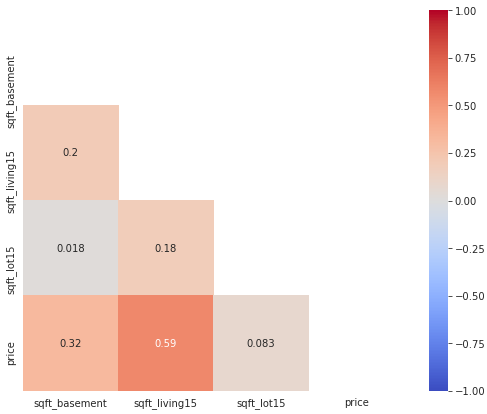

In [336]:
corr = df.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(9, 7))
    ax = sns.heatmap(corr, mask=mask,cmap='coolwarm', vmin=-1,vmax=1,annot=True, square=True)

In [337]:
df.corr()

,sqft_basement,sqft_living15,sqft_lot15,price
sqft_basement,1.000000,0.200443,0.017550,0.323799
sqft_living15,0.200443,1.000000,0.183515,0.585241
sqft_lot15,0.017550,0.183515,1.000000,0.082845
price,0.323799,0.585241,0.082845,1.000000


In [338]:
df.corr().to_csv("correllation.csv")

In [339]:
x=df._get_numeric_data()

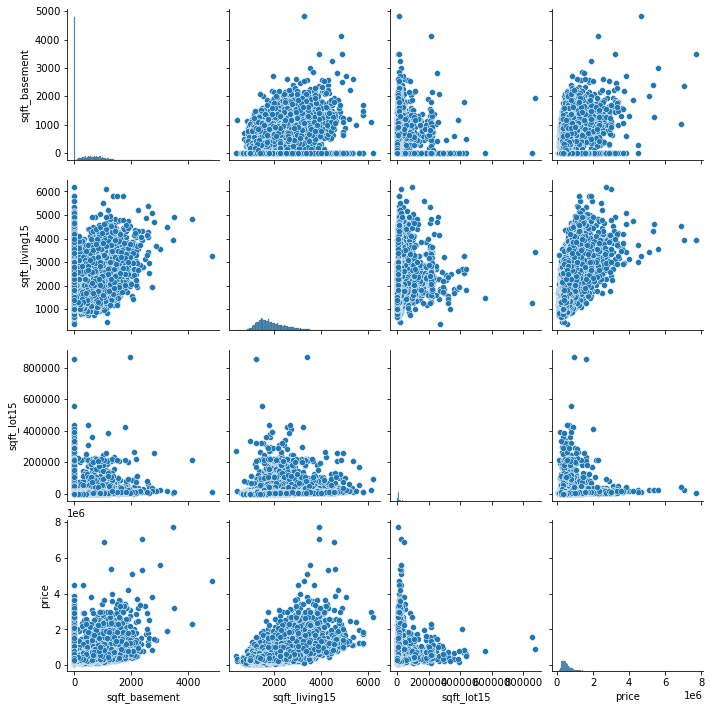

In [340]:
sns.pairplot(x)

### Removing outliers from numerical variables

<AxesSubplot:>

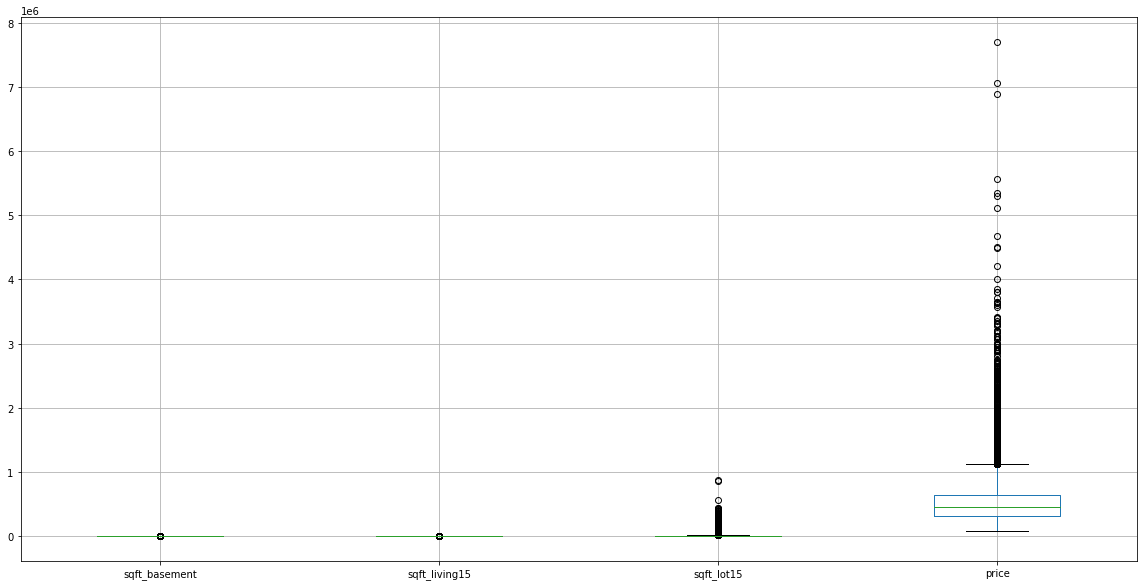

In [341]:
x.boxplot(figsize=(20,10))

In [342]:
#we have outliers in "sqft_lot15" and "price"

C:\Users\merce\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\merce\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


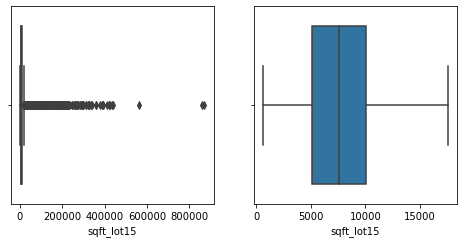

In [343]:
outliers_removal("sqft_lot15")

In [344]:
df=df[df["sqft_lot15"]<200000]

C:\Users\merce\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\merce\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


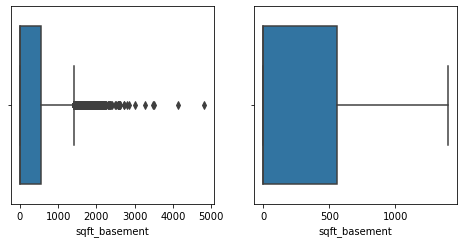

In [346]:
outliers_removal("sqft_basement")

In [349]:
df=df[df["sqft_basement"]<4000]

C:\Users\merce\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\merce\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


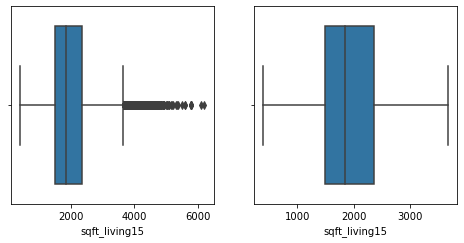

In [350]:
outliers_removal("sqft_living15")

In [362]:
df=df[df["sqft_living15"]<4000]

In [363]:
x=df._get_numeric_data()

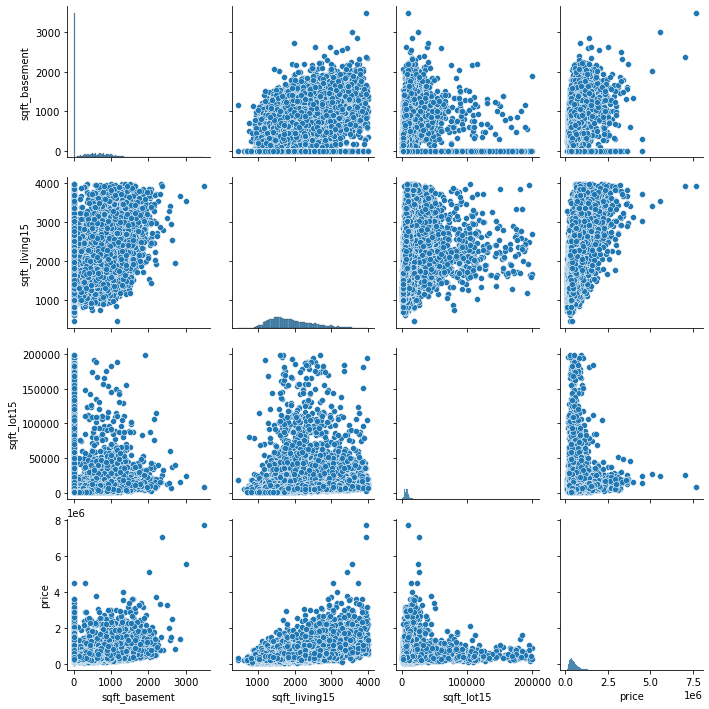

In [364]:
sns.pairplot(x)

### Normality of the numerical variables

array([[<AxesSubplot:title={'center':'sqft_basement'}>,
        <AxesSubplot:title={'center':'sqft_living15'}>],
       [<AxesSubplot:title={'center':'sqft_lot15'}>,
        <AxesSubplot:title={'center':'price'}>]], dtype=object)

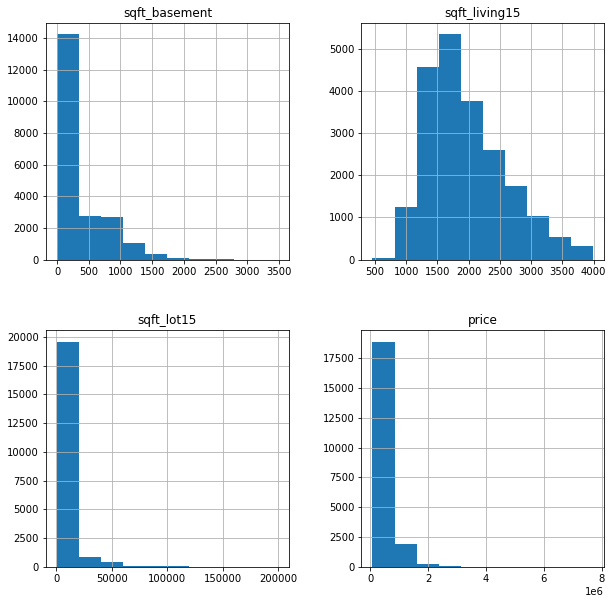

In [366]:
x.hist(figsize=(10,10))

### predective modeling

### XY split

In [368]:
# "price" is our dependent variable. 
# We have to separate our target variable from the others

X=df.drop('price', axis=1)

Y=df.price